In [ ]:
!python -m spacy download en

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import sent_tokenize, word_tokenize
import string
import spacy
nlp = spacy.load("en_core_web_sm")

In [306]:
lang_df = pd.read_csv('./CSV_files/sent_translations.csv')

## Sentence Alignment

In [307]:
lang_df[450:]

,Unnamed: 0,Spanish,English
450,450,El trabajo previo en este grupo de investigaci...,Previous work in this research group centered ...
451,451,Teniendo en cuenta las características Crabtre...,Considering the Crabtree features of this yeas...
452,452,Dado que esta especie está presente en el most...,Since this species is usually present in grape...
453,453,En el caso de levaduras no-Saccharomyces he tr...,The focus of my work on non-Saccharomyces yeas...
454,454,Para S. cerevisiae he utilizado una combinació...,"In the case of S. cerevisiae, I tried to under..."
...,...,...,...
558,558,"En el último periodo 2014-2015, se observó una...",A similar behavior was observed for PM2.5 samp...
559,559,Un comportamiento similar se obtuvo para las m...,"However, there are still sporadic (less intens..."
560,560,"A pesar de las mejoras, todavía se registran e...","The trend in the studied period indicates a, r..."
561,561,La tendencia del periodo estudiado indica una ...,This reduction in the percentage of As(V) is d...


In [308]:
lang_df.drop('Unnamed: 0', 1, inplace=True)

# these columns were not correctly aligned
lang_df.drop([5, 96, 98, 100, 103, 106, 109, 112, 259, 260,261,262, 263, 264, 266, 272, 273, 274, 275, 276, 367, 
              375,410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,422, 434, 435, 436, 281, 282,283, 284, 285, 286,
             287,288, 289, 290, 291, 292,293,294, 295, 296, 297,298,299,300, 301, 302, 397, 398,399,400, 
              401, 402, 403, 404, 405,406,407,408,450,451,452,453,455,456,457, 458, 459, 460, 461, 462, 505, 506,507,508,509], inplace=True)

In [309]:
#lang_df['Spanish'] = lang_df['Spanish'].shift(-1)
lang_df.drop_duplicates(inplace=True)

In [310]:
lang_df.reset_index(inplace=True, drop=True)

In [311]:
lang_df.head()

,Spanish,English
0,La violencia en sus diversas variantes está pr...,Violence in its several variations is present ...
1,Este fenómeno impacta a un alto por ciento de ...,This phenomenon impacts a high percentage of c...
2,La globalización y la continua búsqueda de las...,Globalization and the continued quest of natio...
3,"Asimismo, son estas nuevas tecnologías las que...",It is also these new technologies that can fos...
4,La educación está en constante transmutación c...,Education is constantly changing because of th...


In [312]:
lang_df.drop([433,434,435,436,437,438,439,440], inplace=True)

In [313]:
len(lang_df)

433

In [314]:
lang_df.tail()

,Spanish,English
428,"De manera general, el tiempo de extracción med...","Overall, the extraction time with microwave ra..."
429,Los resultados obtenidos mostraron que la espe...,The results obtained showed that Sb spéciation...
430,Se ha descrito los procedimientos de toma y di...,Sample digestion of the collecting media of PM...
431,El procedimiento de análisis más común combina...,The connnon procedure for As spéciation analys...
432,Se suelen emplear también etapas intermedias e...,Intermediate steps that use hydride generation...


## Example Sentence

In [257]:
lang_df['English'][220]

'José Saramago is the author of a prolific literary work that spans diverse genres, as well as being a public figure committed to the times he lived in.'

In [258]:
lang_df['Spanish'][220]

'José Saramago es autor de una prolífica obra literaria que abarca diversos géneros, además de ser un personaje público comprometido con el tiempo que le tocó vivir.'

## Explatory Data Analysis

In [259]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword_en = stopwords.words('english')
stopword_sp = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carmen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [260]:
def text_stats(doc,stopword):
    """
    Pass in a single document
    as a string
    """
    #sents = sent_tokenize(doc)
    #num_sents = len(sents)
    tokens = word_tokenize(doc)
    num_tokens = len(tokens)
    words = [token.lower() for token in tokens 
             if not token in string.punctuation
             if not token.lower() in stopword]
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    spacy_doc = nlp(doc)
    numerics = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY','ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in numerics]
    num_entities = len(set(entities))
    #words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    stats = [num_tokens, num_words, vocab, num_entities, char_word, lex_div]
    return stats

In [261]:
docs_stats = []
for doc in lang_df['English']:
    docs_stats.append(text_stats(doc, stopword_en))

In [262]:
textstats_en = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_en.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,13,6,6,1,7.333333,1.0000
1,30,16,15,1,7.500000,0.9375
2,26,15,15,1,8.666667,1.0000
3,23,11,11,0,7.909091,1.0000
4,21,10,10,1,7.900000,1.0000


In [263]:
textstats_en.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,33.751152,17.926267,16.917051,1.433180,7.565035,0.964009
std,20.797557,10.980104,9.211276,1.663743,1.081849,0.066448
min,2.000000,1.000000,1.000000,0.000000,3.000000,0.425532
25%,21.250000,11.000000,11.000000,0.000000,6.907249,0.944444
50%,28.000000,15.000000,15.000000,1.000000,7.583333,1.000000
75%,39.750000,21.000000,20.000000,2.000000,8.188312,1.000000
max,193.000000,94.000000,65.000000,10.000000,13.000000,1.000000


In [264]:
nlp = spacy.load("es_core_news_sm")

In [265]:
docs_stats = []
for doc in lang_df['Spanish']:
    docs_stats.append(text_stats(doc, stopword_sp))

In [266]:
textstats_sp = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_sp.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,16,6,6,0,8.166667,1.0
1,41,16,16,0,7.562500,1.0
2,30,16,16,0,9.437500,1.0
3,28,13,13,0,8.615385,1.0
4,23,11,11,0,9.272727,1.0


In [267]:
textstats_sp.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,36.631336,18.502304,17.610599,1.154378,8.101994,0.969329
std,21.178065,10.781742,9.189711,1.882616,1.070909,0.059751
min,3.000000,1.000000,1.000000,0.000000,3.000000,0.500000
25%,24.000000,12.000000,12.000000,0.000000,7.500000,0.950000
50%,32.000000,16.000000,16.000000,0.000000,8.138095,1.000000
75%,42.750000,21.000000,20.750000,1.000000,8.769231,1.000000
max,183.000000,88.000000,65.000000,13.000000,13.000000,1.000000


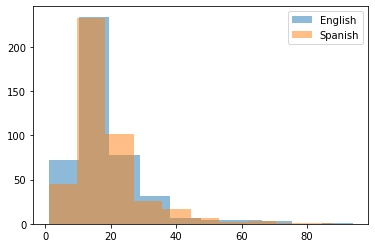

In [268]:
plt.hist(textstats_en['Words'], alpha = .5, label = "English")
plt.hist(textstats_sp['Words'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

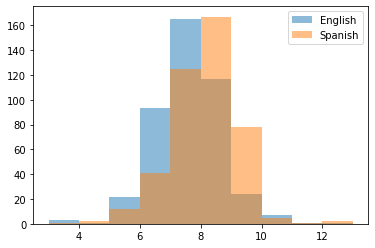

In [269]:
plt.hist(textstats_en['Avg Word Length'], alpha = .5, label = "English")
plt.hist(textstats_sp['Avg Word Length'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

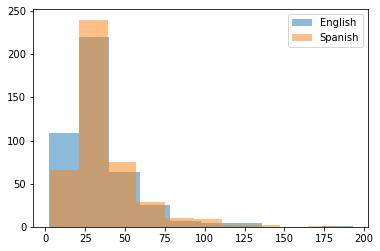

In [270]:
plt.hist(textstats_en['Tokens'], alpha = .5, label = "English")
plt.hist(textstats_sp['Tokens'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

In [271]:
# English text
en_doc = nlp(" ".join(lang_df['English']))
en_without_stopwords = [token for token in en_doc if not token.is_stop]
lemmas = [token.lemma_ for token in en_without_stopwords]

# Spanish text
sp_doc = nlp(" ".join(lang_df['Spanish']))
sp_without_stopwords = [token for token in en_doc if not token.is_stop]
lemmas = [token.lemma_ for token in sp_without_stopwords]

In [272]:
lang_df['English'] = lang_df['English'].apply(lambda x: nltk.word_tokenize(x))
lang_df['Spanish'] = lang_df['Spanish'].apply(lambda x: nltk.word_tokenize(x))

In [230]:
lang_df.head()

,Spanish,English
0,"[La, violencia, en, sus, diversas, variantes, ...","[Violence, in, its, several, variations, is, p..."
1,"[Este, fenómeno, impacta, a, un, alto, por, ci...","[This, phenomenon, impacts, a, high, percentag..."
2,"[La, globalización, y, la, continua, búsqueda,...","[Globalization, and, the, continued, quest, of..."
3,"[Asimismo, ,, son, estas, nuevas, tecnologías,...","[It, is, also, these, new, technologies, that,..."
4,"[La, educación, está, en, constante, transmuta...","[Education, is, constantly, changing, because,..."


In [280]:
def plot_wordcloud(stopwords, lang, text, colormap='Reds', mask=None,max_words=500,max_font_size=100,figure_size=(24.0,16.0),title = None, title_size=40, image_color=False):
    stopwords = set(lang)
    more_stopwords = {'one', 'br', 'pr', 'th', 'sayi', 'fo', 'Unknown', 'las', 'la', 'va', 'ha', 'en', 
                          'un', 'han', 'c', 'estas', 'estos', 'dtype', 'se', 'por', 'para', 'de', 'este', 'está','t', 'y', 'm', 'r', 'v', 'p', 'sb', 'iii', 'i'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    colormap = colormap,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                              'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [281]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
spanish_stopwords = stopwords.words('spanish')

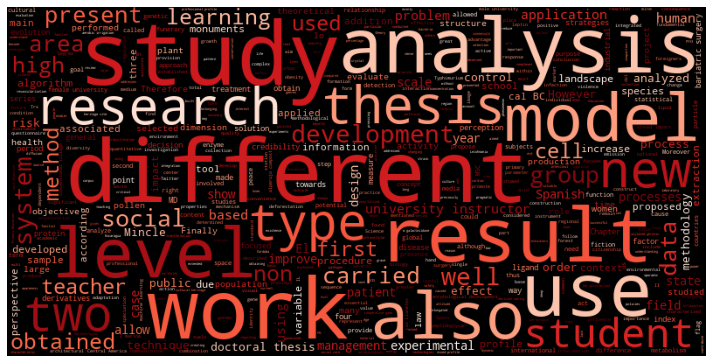

In [282]:
plot_wordcloud(stopword_en, english_stopwords, en_doc, figure_size=(10,10))

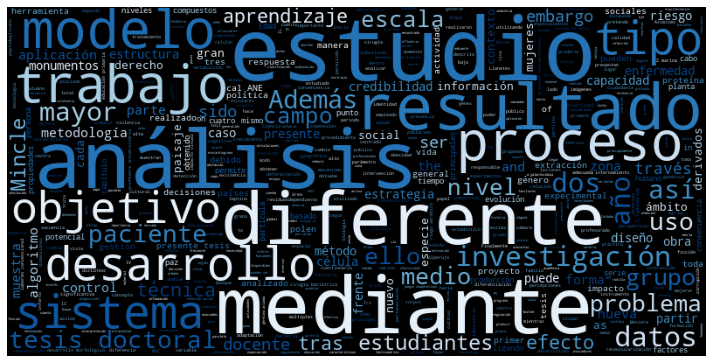

In [284]:
plot_wordcloud(stopword_sp, spanish_stopwords, sp_doc, colormap='Blues', figure_size=(10,10))